In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy import stats
from Util.tools import *

In [32]:
X_train = pd.read_csv('../challenge_data/X_train.csv')
Y_train = pd.read_csv('../challenge_data/Y_train.csv')
X_test = pd.read_csv('../challenge_data/X_test.csv')

In [33]:
X_train_clean = fill_missing_with_average(X_train)
X_test_clean = fill_missing_with_average(X_test)


In [34]:
X_train_clean.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,-0.573520,0.692860,0.573520,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,-0.694004,0.990324,0.694004,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [35]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


In [36]:
#According to the heatmap，remove collinear features
columns_to_drop = ['DE_FR_EXCHANGE', 'FR_NET_EXPORT', 'DE_NET_EXPORT']

X_train_clean.drop(columns=columns_to_drop, inplace=True)
X_test_clean.drop(columns=columns_to_drop, inplace=True)

In [37]:
from scipy.stats import spearmanr

# 计算每个特征与目标的Spearman相关系数
correlations = {}
for column in X_train_clean.columns:
    # 计算Spearman相关系数和p值
    corr, _ = spearmanr(X_train_clean[column], Y_train['TARGET'])
    correlations[column] = corr

# 将相关系数转换为数据框并按其绝对值排序
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df['Absolute_Correlation'] = corr_df['Correlation'].abs()
sorted_corr_df = corr_df.sort_values('Absolute_Correlation', ascending=False)

# 显示排序后的相关系数数据框
print(sorted_corr_df)


             Feature  Correlation  Absolute_Correlation
6      DE_NET_IMPORT     0.188290              0.188290
18        DE_WINDPOW    -0.185688              0.185688
21  DE_RESIDUAL_LOAD     0.175793              0.175793
19        FR_WINDPOW    -0.155568              0.155568
12          DE_HYDRO     0.151367              0.151367
8             DE_GAS     0.129905              0.129905
31        CARBON_RET     0.104375              0.104375
25           DE_WIND    -0.081411              0.081411
10           DE_COAL     0.072380              0.072380
29           GAS_RET     0.066800              0.066800
13          FR_HYDRO     0.064682              0.064682
3     DE_CONSUMPTION    -0.063617              0.063617
26           FR_WIND    -0.061300              0.061300
24           FR_RAIN    -0.051889              0.051889
5     FR_DE_EXCHANGE     0.051685              0.051685
11           FR_COAL     0.048463              0.048463
20        DE_LIGNITE     0.044180              0

In [38]:
X_train_de = X_train_clean[X_train_clean['COUNTRY'] == 'DE']

X_test_de = X_test_clean[X_test_clean['COUNTRY'] == 'DE']

X_train_fr = X_train_clean[X_train_clean['COUNTRY'] == 'FR']

X_test_fr = X_test_clean[X_test_clean['COUNTRY'] == 'FR']

In [40]:
 # 合并德国数据集
X_train_de = pd.merge(X_train_de, Y_train, on='ID', how='inner')

# 合并法国数据集
X_train_fr = pd.merge(X_train_fr, Y_train, on='ID', how='inner')


In [49]:
X_train_fr


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,0.606523,0.573520,-0.692860,0.441238,-0.213766,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,0.022063,0.573520,1.130838,0.174773,0.426940,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,-1.021305,0.622021,1.682587,2.351913,2.122241,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,1101,818,FR,0.143807,-0.617038,0.924990,0.694004,-0.990324,0.238693,-0.240862,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
4,1520,467,FR,-0.295296,-0.765120,0.717490,1.117139,0.200305,1.533595,0.306422,...,-0.962519,-0.193837,-0.871600,-0.917234,0.102046,0.472708,0.891049,0.861408,1.124457,0.932105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,1776,510,FR,0.422357,-0.704613,1.019784,0.977214,-1.112333,1.147306,-0.456156,...,1.848129,1.021354,1.070862,0.805043,-0.322520,-0.555211,1.946355,0.867074,1.322433,0.108277
847,1401,985,FR,0.117491,0.944372,-1.171116,-1.403843,-0.499653,-0.110824,1.320758,...,-0.371909,-0.441164,-0.666013,-0.658130,0.324165,0.829517,0.494188,1.011794,1.472650,0.827636
848,1728,905,FR,0.968724,0.459382,-0.996808,-0.101161,1.048997,2.360936,0.715357,...,-0.291708,-0.152293,1.128147,1.697829,-2.413150,-2.069991,1.145686,0.335645,0.606318,0.049618
849,1674,887,FR,1.618582,1.752840,-0.611392,-0.449153,0.152146,1.972779,1.558300,...,-0.108674,0.517212,-0.626357,0.529362,0.472392,0.518065,0.932633,-0.085690,0.356356,-0.063546


In [55]:
import xgboost as xgb
features = [col for col in X_train_de.columns if col not in ['ID', 'DAY_ID', 'COUNTRY', 'TARGET']]

# 创建并拟合XGBoost模型
model_xgb_de = xgb.XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=1)  
model_xgb_de.fit(X_train_de[features], X_train_de['TARGET'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

<Figure size 1000x600 with 0 Axes>

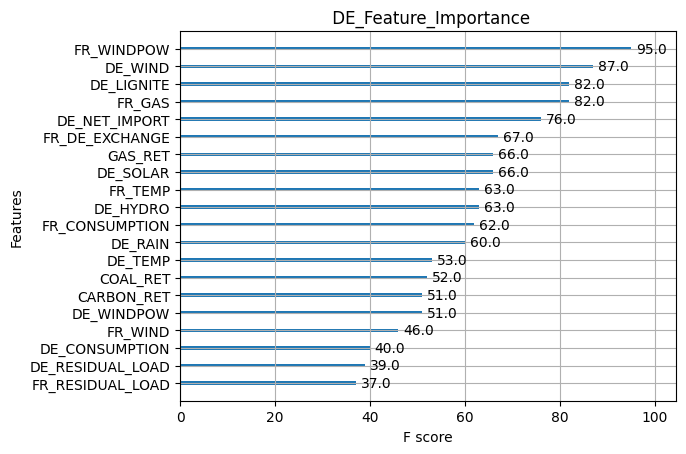

In [56]:
# 可视化特征重要性
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_xgb_de, max_num_features=20)  # 限制显示的特征数量
plt.title(' DE_Feature_Importance')
plt.show()

In [57]:
# 创建并拟合XGBoost模型
features = [col for col in X_train_fr.columns if col not in ['ID', 'DAY_ID', 'COUNTRY', 'TARGET']]

model_xgb_fr = xgb.XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=1)  
model_xgb_fr.fit(X_train_fr[features], X_train_fr['TARGET'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [58]:
output_train = model_xgb_de.predict(X_train_de[features])

result_train = metric_train(output_train, X_train_de['TARGET'])

Spearman correlation for the train set: 87.7%


<Figure size 1000x600 with 0 Axes>

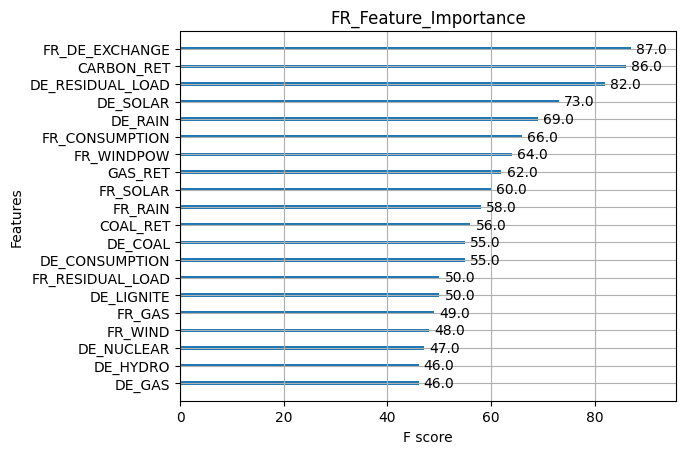

In [59]:
# 可视化特征重要性
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_xgb_fr, max_num_features=20)  # 限制显示的特征数量
plt.title('FR_Feature_Importance')
plt.show()

In [60]:
output_train = model_xgb_fr.predict(X_train_fr[features])

result_train = metric_train(output_train, X_train_fr['TARGET'])

Spearman correlation for the train set: 68.0%


In [68]:


# 创建包含ID和预测结果的DataFrame
submission_fr = pd.DataFrame({'ID': X_test_fr['ID'], 'TARGET': model_xgb_fr.predict(X_test_fr[features])})
submission_de = pd.DataFrame({'ID': X_test_de['ID'], 'TARGET': model_xgb_de.predict(X_test_de[features])})

# 合并两个DataFrame
submission = pd.concat([submission_fr, submission_de])

# 保存为CSV文件
submission.to_csv('submission_wz1.csv', index=False)

Selected: DE_LIGNITE, Score: -1.3180288661356354
Selected: DE_TEMP, Score: -1.3089576389726147
Selected: FR_WINDPOW, Score: -1.2399160061963197
Selected: DE_COAL, Score: -1.2509342854726353
Selected: FR_NUCLEAR, Score: -1.236178478558896
Selected: DE_GAS, Score: -1.2516158653303335
Selected: DE_SOLAR, Score: -1.2185344770043478
Selected: CARBON_RET, Score: -1.1637183730261036
Selected: FR_RESIDUAL_LOAD, Score: -1.1743991482311482
Selected: DE_RESIDUAL_LOAD, Score: -1.1609645485020441
Selected: FR_TEMP, Score: -1.1504133721743588
Selected: FR_SOLAR, Score: -1.12997253996105
Selected: DE_HYDRO, Score: -1.1520171292663968
Selected: DE_NUCLEAR, Score: -1.1305185728139975
Selected: DE_RAIN, Score: -1.1763298056107292
Selected: GAS_RET, Score: -1.15254781353545
Selected: DE_WIND, Score: -1.180911331449296
Selected: FR_GAS, Score: -1.1632737562697866
Selected: FR_HYDRO, Score: -1.1701154382002747
Selected: FR_WIND, Score: -1.1781343836881781
Selected: DE_WINDPOW, Score: -1.2198927616337574
Se

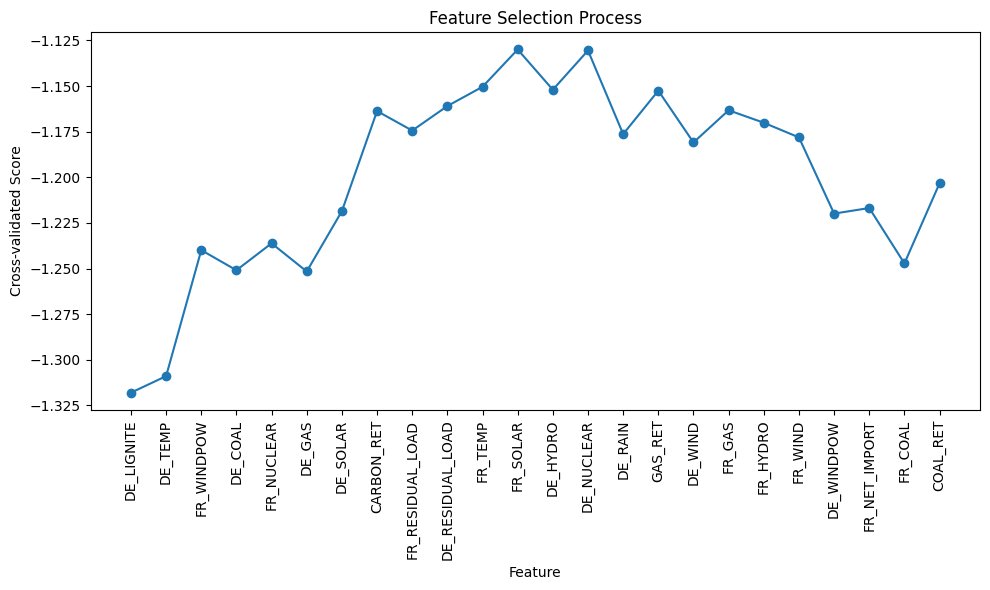

In [52]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义一个函数来执行逐步特征选择
def stepwise_feature_selection(X, y, initial_features, model):
    selected_features = initial_features.copy()
    remaining_features = [f for f in X.columns if f not in initial_features]
    scores = {}

    while remaining_features:
        feature_scores = {}
        for feature in remaining_features:
            trial_features = selected_features + [feature]
            score = np.mean(cross_val_score(model, X[trial_features], y, cv=5, scoring='neg_mean_squared_error'))
            feature_scores[feature] = score

        best_feature = max(feature_scores, key=feature_scores.get)
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        scores[best_feature] = feature_scores[best_feature]
        print(f"Selected: {best_feature}, Score: {feature_scores[best_feature]}")

        # 可以设置一个阈值来停止特征添加
        # if len(selected_features) == max_features_to_select:
        #     break

    return selected_features, scores

# 通过XGBoost内置函数获取特征重要性，并选择最重要的特征作为初始特征集
importance = model_xgb_de.get_booster().get_score(importance_type="weight")
sorted_importance = sorted(importance.items(), key=lambda item: item[1], reverse=True)

# 选取前N个重要特征作为初始集合
initial_features = [feature for feature, importance in sorted_importance[:5]]  # 可以开始于前5个特征，然后添加

# 执行逐步特征选择
optimal_features, feature_scores = stepwise_feature_selection(X_train_de[features], X_train_de['TARGET'], initial_features, model_xgb_de)

# 可视化特征选择过程
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_scores)), list(feature_scores.values()), marker='o')
plt.xticks(range(len(feature_scores)), list(feature_scores.keys()), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cross-validated Score')
plt.title('Feature Selection Process')
plt.tight_layout()
plt.show()


In [69]:
optimal_features_list = list(optimal_features)
print(optimal_features_list)


['DE_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_CONSUMPTION', 'DE_NET_IMPORT', 'FR_RAIN', 'DE_LIGNITE', 'DE_TEMP', 'FR_WINDPOW', 'DE_COAL', 'FR_NUCLEAR', 'DE_GAS', 'DE_SOLAR', 'CARBON_RET', 'FR_RESIDUAL_LOAD', 'DE_RESIDUAL_LOAD', 'FR_TEMP', 'FR_SOLAR', 'DE_HYDRO', 'DE_NUCLEAR', 'DE_RAIN', 'GAS_RET', 'DE_WIND', 'FR_GAS', 'FR_HYDRO', 'FR_WIND', 'DE_WINDPOW', 'FR_NET_IMPORT', 'FR_COAL', 'COAL_RET']


In [70]:
features_selected_de = ['DE_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_CONSUMPTION', 'DE_NET_IMPORT', 'FR_RAIN', 'DE_LIGNITE', 'DE_TEMP', 'FR_WINDPOW', 
'DE_COAL', 'FR_NUCLEAR', 'DE_GAS', 'DE_SOLAR', 'CARBON_RET', 'FR_RESIDUAL_LOAD', 'DE_RESIDUAL_LOAD', 'FR_TEMP', 'FR_SOLAR', 'DE_HYDRO', 'DE_NUCLEAR']

Selected: DE_LIGNITE, Score: -1.2177216286443364
Selected: DE_GAS, Score: -1.1840177813492248
Selected: FR_NUCLEAR, Score: -1.1708917056926011
Selected: DE_NET_IMPORT, Score: -1.1649937713929277
Selected: DE_TEMP, Score: -1.1562563316809666
Selected: FR_TEMP, Score: -1.1624260427064859
Selected: FR_GAS, Score: -1.1535260462616033
Selected: FR_RESIDUAL_LOAD, Score: -1.1574064367114292
Selected: FR_NET_IMPORT, Score: -1.1671971715140081
Selected: COAL_RET, Score: -1.1832504593179187
Selected: DE_WINDPOW, Score: -1.1954699718454846
Selected: FR_HYDRO, Score: -1.2090170424477429
Selected: DE_WIND, Score: -1.2122999814696562
Selected: DE_NUCLEAR, Score: -1.2162847187889059
Selected: FR_WIND, Score: -1.221872276661649
Selected: FR_COAL, Score: -1.2392933223762657
Selected: DE_HYDRO, Score: -1.266935032029053
Selected: DE_COAL, Score: -1.2931100658314605
Selected: DE_CONSUMPTION, Score: -1.3440413374537223


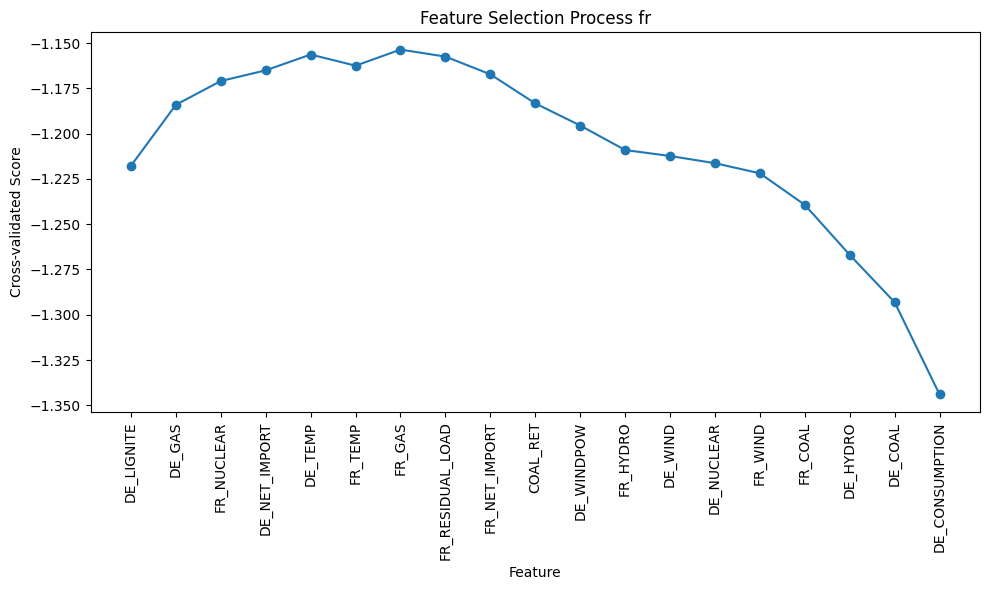

In [71]:
# 通过XGBoost内置函数获取特征重要性，并选择最重要的特征作为初始特征集
importance = model_xgb_fr.get_booster().get_score(importance_type="weight")
sorted_importance = sorted(importance.items(), key=lambda item: item[1], reverse=True)

# 选取前N个重要特征作为初始集合
initial_features = [feature for feature, importance in sorted_importance[:10]]  # 可以开始于前5个特征，然后添加

# 执行逐步特征选择
optimal_features, feature_scores = stepwise_feature_selection(X_train_fr[features], X_train_fr['TARGET'], initial_features, model_xgb_fr)

# 可视化特征选择过程
plt.figure(figsize=(10, 6))
plt.plot(range(len(feature_scores)), list(feature_scores.values()), marker='o')
plt.xticks(range(len(feature_scores)), list(feature_scores.keys()), rotation=90)
plt.xlabel('Feature')
plt.ylabel('Cross-validated Score')
plt.title('Feature Selection Process fr')
plt.tight_layout()
plt.show()


In [72]:
optimal_features_list = list(optimal_features)
print(optimal_features_list)

['FR_DE_EXCHANGE', 'CARBON_RET', 'DE_RESIDUAL_LOAD', 'DE_SOLAR', 'DE_RAIN', 'FR_CONSUMPTION', 'FR_WINDPOW', 'GAS_RET', 'FR_SOLAR', 'FR_RAIN', 'DE_LIGNITE', 'DE_GAS', 'FR_NUCLEAR', 'DE_NET_IMPORT', 'DE_TEMP', 'FR_TEMP', 'FR_GAS', 'FR_RESIDUAL_LOAD', 'FR_NET_IMPORT', 'COAL_RET', 'DE_WINDPOW', 'FR_HYDRO', 'DE_WIND', 'DE_NUCLEAR', 'FR_WIND', 'FR_COAL', 'DE_HYDRO', 'DE_COAL', 'DE_CONSUMPTION']


In [73]:
features_selected_fr =['FR_DE_EXCHANGE', 'CARBON_RET', 'DE_RESIDUAL_LOAD', 'DE_SOLAR', 'DE_RAIN', 'FR_CONSUMPTION', 'FR_WINDPOW', 'GAS_RET', 'FR_SOLAR', 'FR_RAIN', 'DE_LIGNITE', 'DE_GAS', 'FR_NUCLEAR', 'DE_NET_IMPORT', 'DE_TEMP', 'FR_TEMP', 'FR_GAS']

In [74]:
model_xgb_de2 = xgb.XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=1)  
model_xgb_de2.fit(X_train_de[features_selected_de], X_train_de['TARGET'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [76]:
output_train = model_xgb_de2.predict(X_train_de[features_selected_de])
result_train = metric_train(output_train, X_train_de['TARGET'])

Spearman correlation for the train set: 84.7%


In [77]:
model_xgb_fr2 = xgb.XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=1)  
model_xgb_fr2.fit(X_train_fr[features_selected_fr], X_train_fr['TARGET'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [78]:
output_train = model_xgb_fr2.predict(X_train_fr[features_selected_fr])
result_train = metric_train(output_train, X_train_fr['TARGET'])

Spearman correlation for the train set: 67.1%


In [79]:
# 创建包含ID和预测结果的DataFrame
submission_fr = pd.DataFrame({'ID': X_test_fr['ID'], 'TARGET': model_xgb_fr2.predict(X_test_fr[features_selected_fr])})
submission_de = pd.DataFrame({'ID': X_test_de['ID'], 'TARGET': model_xgb_de2.predict(X_test_de[features_selected_de])})

# 合并两个DataFrame
submission = pd.concat([submission_fr, submission_de])

# 保存为CSV文件
submission.to_csv('submission_wz2.csv', index=False)